## Data Preprocessing

In [ ]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics as st

###Import Data

In [ ]:
path="/content/drive/MyDrive/Machine Learning/CH-512/Project/Table - IN_Table.csv.csv"
data= pd.read_csv(path)
data.describe()

IN1           IN2           IN3           IN4           IN5  \
count  1.440100e+04  1.440100e+04  1.440100e+04  1.440100e+04  1.440100e+04   
mean  -3.911535e-12 -1.658765e-12 -2.405762e-12  2.957421e-12  1.521103e-12   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -2.696646e+00 -3.437986e+00 -2.639204e+00 -2.354538e+00 -1.934470e+00   
25%   -3.385843e-01 -9.371822e-01 -3.013195e-01 -8.791605e-01 -7.130980e-01   
50%    3.617588e-01  5.709954e-01  2.248603e-01  5.034075e-01 -4.158845e-02   
75%    6.842442e-01  7.610581e-01  4.011428e-01  8.862316e-01  5.721888e-01   
max    1.590639e+00  1.939639e+00  1.844610e+00  1.654608e+00  3.615581e+00   

               Out1          Out2  
count  1.440100e+04  1.440100e+04  
mean   3.521351e-11  8.724543e-13  
std    1.000000e+00  1.000000e+00  
min   -5.201644e+00 -5.989071e+00  
25%   -5.060039e-01 -5.130819e-01  
50%    1.648018e-01 -3.687546e-03  
75%    6.439487e-01  5.057068e-01  
max    1.396423e+01  7.637227e+00

In [ ]:
data.corr()

IN1       IN2       IN3       IN4       IN5      Out1      Out2
IN1   1.000000  0.500407  0.924350  0.438273  0.455514  0.624829  0.381853
IN2   0.500407  1.000000  0.321950  0.895081  0.081605  0.388346  0.201564
IN3   0.924350  0.321950  1.000000  0.197927  0.365890  0.572199  0.415136
IN4   0.438273  0.895081  0.197927  1.000000  0.013679  0.301107  0.203665
IN5   0.455514  0.081605  0.365890  0.013679  1.000000  0.428711  0.101761
Out1  0.624829  0.388346  0.572199  0.301107  0.428711  1.000000 -0.151741
Out2  0.381853  0.201564  0.415136  0.203665  0.101761 -0.151741  1.000000

###Removing the outliers


In [ ]:
#the median method gave higher accuracy than the mean.
def outlier(data):
    for column in data.columns:
        data[column] = data[column].astype(float)
        mean = st.median(data[column])
        std_dev = np.std(data[column])
        lower_bound = mean - 3 * std_dev
        upper_bound = mean + 3 * std_dev
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data
data_c = outlier(data)
data_c.describe()

<ipython-input-8-197c46dedad7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].astype(float)


IN1           IN2           IN3           IN4           IN5  \
count  14014.000000  14014.000000  14014.000000  14014.000000  14014.000000   
mean       0.012522      0.020190      0.008128      0.025368     -0.010260   
std        0.985636      0.995023      0.984860      0.991940      0.970358   
min       -2.634673     -2.422492     -2.631096     -2.354538     -1.934470   
25%       -0.286878     -0.918594     -0.292456     -0.877885     -0.709796   
50%        0.366122      0.621044      0.225352      0.515633     -0.042572   
75%        0.680357      0.763112      0.400686      0.887366      0.566638   
max        1.530461      1.939639      1.844610      1.654608      2.957842   

               Out1          Out2  
count  14014.000000  14014.000000  
mean      -0.001105     -0.006577  
std        0.923232      0.883825  
min       -2.805909     -2.805356  
25%       -0.506004     -0.513082  
50%        0.164802     -0.003688  
75%        0.643949      0.505707  
max        3.135513      2.797981

###Plotting The Graphs

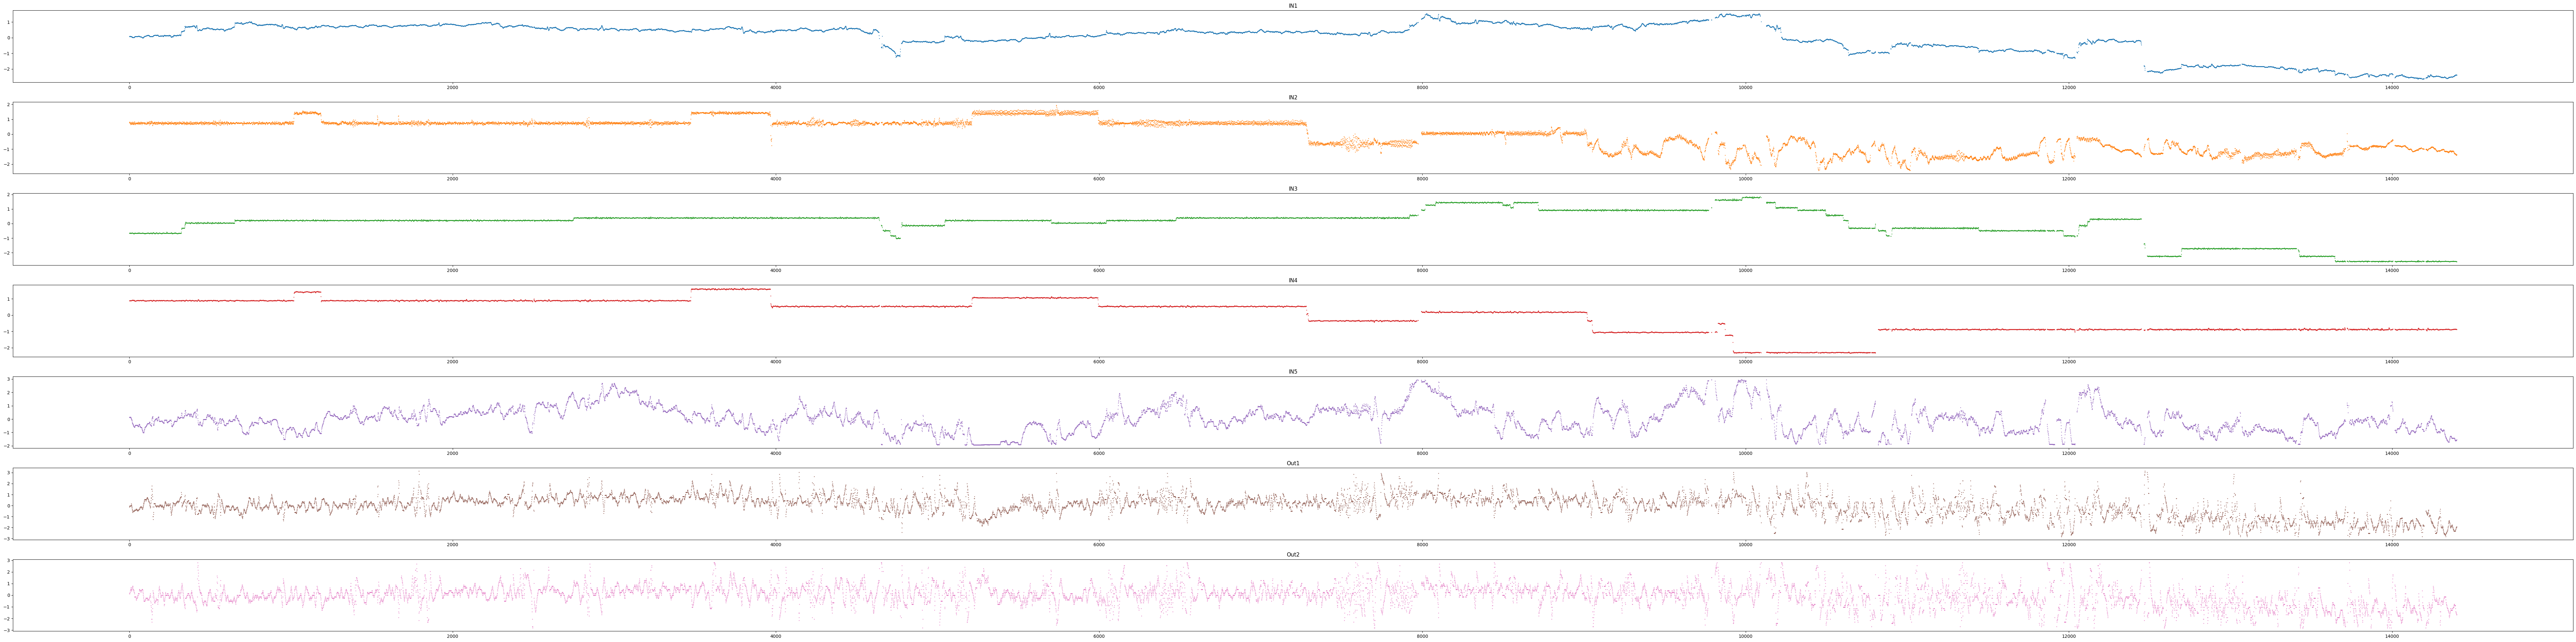

In [ ]:
plt.figure(figsize=(80, 20))

for i, col in enumerate(data.columns, start=1):
    plt.subplot(7, 1, i)
    plt.scatter(data_c.index, data_c[col], marker='.', color='C{}'.format(i-1),s=2)
    plt.title(col)

plt.tight_layout()

plt.show()

In [ ]:
data_c.corr()

IN1       IN2       IN3       IN4       IN5      Out1      Out2
IN1   1.000000  0.508753  0.922762  0.450860  0.451824  0.676426  0.439461
IN2   0.508753  1.000000  0.329712  0.899190  0.076832  0.411586  0.251953
IN3   0.922762  0.329712  1.000000  0.207395  0.362761  0.630088  0.458906
IN4   0.450860  0.899190  0.207395  1.000000  0.027312  0.335210  0.240758
IN5   0.451824  0.076832  0.362761  0.027312  1.000000  0.447183  0.144558
Out1  0.676426  0.411586  0.630088  0.335210  0.447183  1.000000 -0.006573
Out2  0.439461  0.251953  0.458906  0.240758  0.144558 -0.006573  1.000000

### Error Details

In [ ]:
def results(Y_pred,Y_test,M):
  from sklearn.metrics import mean_squared_error,r2_score

  SSE= mean_squared_error(Y_pred,Y_test)
  MSE= np.mean((y1_test - y1_pred) **2)
  n=len(Y_test)

  AIC = M*2         +n*(np.log(SSE/n))
  BIC = M*np.log(n) +n*(np.log(SSE/n))


  print('R2  : ', r2_score(Y_pred,Y_test))
  print('SSE : ', SSE )
  print('MSE : ', MSE )

  print('aic : ', AIC)
  print('bic : ', BIC)

#Multivariate Linear Regression

###Loading Data

In [ ]:
x  = data_c.loc[:,['IN1','IN2','IN5']]
y1 = data_c.loc[:,'Out1']

###Splitting Dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y1_train, y1_test = train_test_split(x, y1,test_size=0.2, random_state=42)

### Applying Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor_y1 = LinearRegression()
regressor_y1.fit(x_train, y1_train)

LinearRegression()

In [ ]:
y1_test_values = y1_test.values
y1_pred = regressor_y1.predict(x_test)
print(np.concatenate((y1_pred.reshape(len(y1_pred),1), y1_test_values.reshape(len(y1_test_values),1)),1))

[[ 0.11567933  0.45228992]
 [ 0.18819728 -0.12268636]
 [-0.83381018 -0.8893214 ]
 ...
 [ 0.33487231  0.0689724 ]
 [ 0.06346341  1.31475434]
 [-0.26497554 -0.4101745 ]]


### Plotting Result

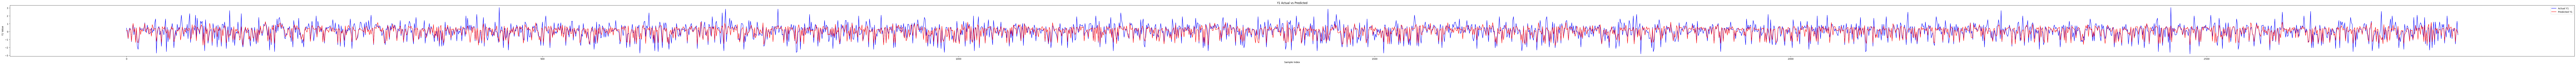

In [ ]:
plt.figure(figsize=(200,4))
plt. plot(range(len(y1_test)), y1_test, color='blue', label='Actual Y1')
plt.plot(range(len(y1_test)), y1_pred, color='red', label='Predicted Y1')
plt.xlabel('Sample Index')
plt.ylabel('Y1 Value')
plt.title('Y1 Actual vs Predicted')
plt.legend()
plt.show()

In [ ]:
results(y1_test,y1_pred,3)

SSE :  0.39322193771565533
R2  :  0.5282584527363029
MSE :  0.39322193771565533
aic :  -24861.7301018115
bic :  -24843.914765158006


# Polynomial

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree = 7)
x_poly = poly_reg.fit_transform(x_train)

regressor = LinearRegression()
regressor.fit(x_poly, y1_train)

LinearRegression()

In [ ]:
y1_test_values = y1_test.values
y1_pred = regressor.predict(poly_reg.transform(x_test))
np.set_printoptions(precision=2)
print(np.concatenate((y1_pred.reshape(len(y1_pred),1), y1_test_values.reshape(len(y1_test),1)),1))

[[ 0.05  0.45]
 [ 0.1  -0.12]
 [-0.99 -0.89]
 ...
 [-0.11  0.07]
 [ 0.5   1.31]
 [-0.74 -0.41]]


### Plotting Results

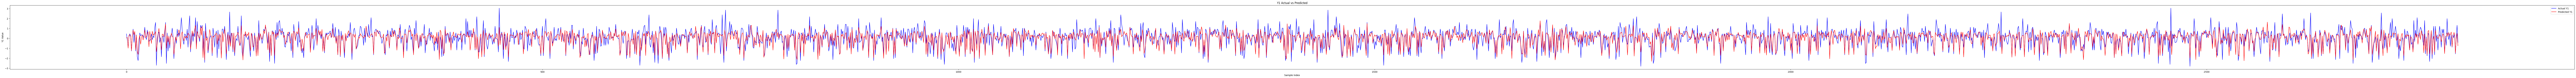

In [ ]:
plt.figure(figsize=(200, 5))
plt.plot(range(len(y1_test)), y1_test, color='blue', label='Actual Y1')
plt.plot(range(len(y1_test)), y1_pred, color='red', label='Predicted Y1')
plt.xlabel('Sample Index')
plt.ylabel('Y1 Value')
plt.title('Y1 Actual vs Predicted')
plt.legend()
plt.show()

In [ ]:
results(y1_test,y1_pred,7)

R2  :  0.5904176928029863
SSE :  0.3414088698022394
MSE :  0.3414088698022394
aic :  -25249.775470577453
bic :  -25208.2063517193


# Lasso regression

In [ ]:
X  = data_c.loc[:,['IN1','IN2','IN5']]
Y = data_c.loc[:,'Out1']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=1e-9)
lasso_model.fit(X_train, Y_train)

Lasso(alpha=1e-09)

In [ ]:
Y_test_values = Y_test.values
y_pred = lasso_model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),Y_test_values.reshape(len(Y_test_values),1)),1))


[[ 0.05 -0.7 ]
 [-0.4   0.16]
 [ 0.11  0.36]
 ...
 [ 0.27  0.84]
 [ 0.21 -0.22]
 [ 0.55  0.36]]


In [ ]:
results(Y_test,y_pred,7)

NameError: name 'Y_test' is not defined

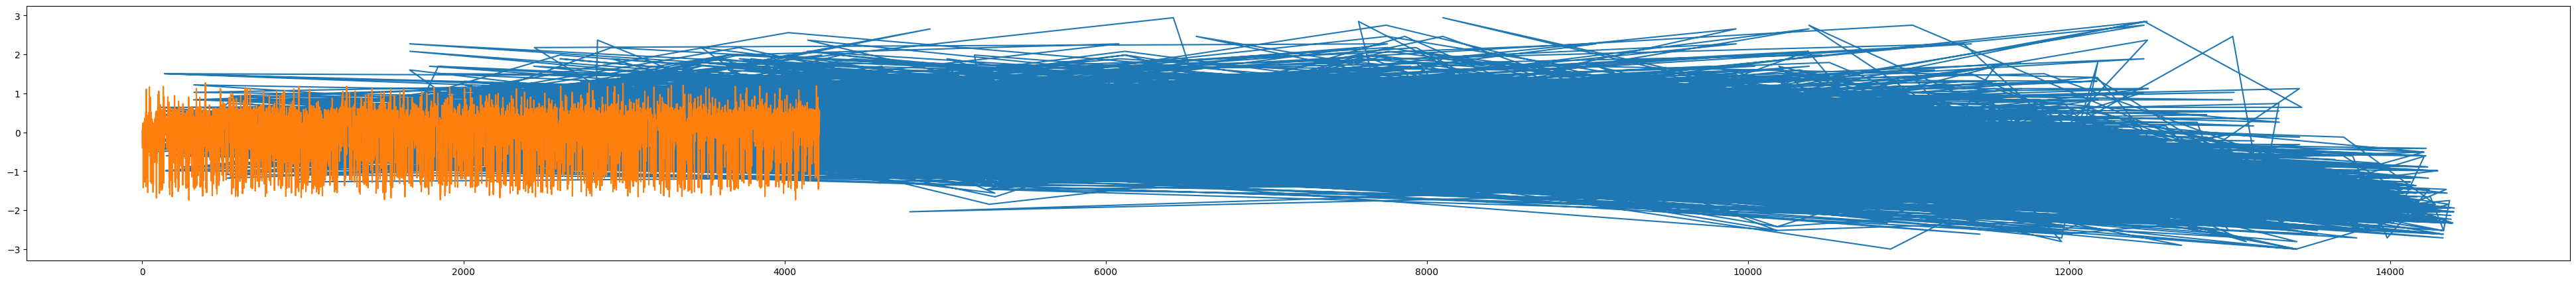

In [ ]:
plt.plot(Y_test)
plt.plot(y_pred)
plt.subplots_adjust(left=0.01, bottom=0.1, right=6,
                    top=0.9, wspace=0.4,hspace=0.2)
plt.show()

In [ ]:
print("the value of B (Coefficients) is : ",lasso_model.intercept_,lasso_model.coef_)

the value of B (Coefficients) is :  -0.008325880717803434 [0.5  0.11 0.19]


In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Load the Boston Housing dataset
data = data_c

# Extract features and target variable
X = data['IN1']
y = data['Out1']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the 1D arrays to 2D arrays
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the Lasso regression model
alpha = 0.1  # Regularization strength
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred = lasso.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Print the coefficients
print("Coefficients:", lasso.coef_)

Mean Squared Error: 0.4686484888959418
Coefficients: [0.54]


In [ ]:
print(r2_score(y_test, y_pred))

0.4431645620800091


#PCA

In [ ]:
x  = data_c.loc[:,['IN1','IN2','IN5','IN3','IN4']]
y1 = data_c.loc[:,'Out1']

In [ ]:
x = StandardScaler().fit_transform(X)

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)

# Creating a DataFrame with the principal components
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2','PC3'])

# Concatenating DataFrame along columns axis
finalDf = pd.concat([principalDf,Y1], axis=1)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

NameError: name 'StandardScaler' is not defined

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(principalDf, y, test_size=0.2, random_state=42)
regressor_y1 = LinearRegression()
regressor_y1.fit(x_train, y1_train)
y1_test_values = y1_test.values
y1_pred = regressor_y1.predict(x_test)
print(np.concatenate((y1_pred.reshape(len(y1_pred),1), y1_test_values.reshape(len(y1_test_values),1)),1))

NameError: name 'principalDf' is not defined

In [ ]:
plt.figure(figsize=(200,4))
plt. plot(range(len(y1_test)), y1_test, color='blue', label='Actual Y1')
plt.plot(range(len(y1_test)), y1_pred, color='red', label='Predicted Y1')
plt.xlabel('Sample Index')
plt.ylabel('Y1 Value')
plt.title('Y1 Actual vs Predicted')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

In [ ]:
from sklearn.metrics import r2_score
print('R2=',r2_score(y1_test, y1_pred))

n_samples = len(y1_test)
n_parameters = x_train.shape[1] + 1
n_samples * np.log(np.mean((y1_test - y1_pred) ** 2)) + 2 * n_parameters

In [ ]:
x  = data_c.loc[:,['IN1','IN2','IN5','IN3','IN4']]
y1 = data_c.loc[:,'Out1']

In [ ]:
x = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2',])
finalDf = pd.concat([principalDf,Y1], axis=1)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

In [ ]:
X_train, X_test, y1_train, y1_test = train_test_split(principalDf, y1, test_size=0.2, random_state=42)

# Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Fit a linear regression model
regressor = LinearRegression()
regressor.fit(X_train_poly, y1_train)

# Predictions
y_pred = regressor.predict(X_test_poly)

# Calculate and print Mean Squared Error
mse = mean_squared_error(y1_test, y1_pred)
print("Mean Squared Error:", mse)

from sklearn.metrics import r2_score
print('R2=',r2_score(y1_test, y1_pred))

Epoch 1/70
192/192 - 2s - loss: 0.0081 - 2s/epoch - 8ms/step
Epoch 2/70
192/192 - 0s - loss: 0.0016 - 316ms/epoch - 2ms/step
Epoch 3/70
192/192 - 0s - loss: 0.0016 - 338ms/epoch - 2ms/step
Epoch 4/70
192/192 - 0s - loss: 0.0016 - 323ms/epoch - 2ms/step
Epoch 5/70
192/192 - 0s - loss: 0.0016 - 316ms/epoch - 2ms/step
Epoch 6/70
192/192 - 0s - loss: 0.0015 - 344ms/epoch - 2ms/step
Epoch 7/70
192/192 - 0s - loss: 0.0015 - 322ms/epoch - 2ms/step
Epoch 8/70
192/192 - 0s - loss: 0.0015 - 313ms/epoch - 2ms/step
Epoch 9/70
192/192 - 0s - loss: 0.0015 - 335ms/epoch - 2ms/step
Epoch 10/70
192/192 - 0s - loss: 0.0015 - 319ms/epoch - 2ms/step
Epoch 11/70
192/192 - 0s - loss: 0.0015 - 313ms/epoch - 2ms/step
Epoch 12/70
192/192 - 0s - loss: 0.0015 - 341ms/epoch - 2ms/step
Epoch 13/70
192/192 - 0s - loss: 0.0015 - 316ms/epoch - 2ms/step
Epoch 14/70
192/192 - 0s - loss: 0.0015 - 310ms/epoch - 2ms/step
Epoch 15/70
192/192 - 0s - loss: 0.0015 - 320ms/epoch - 2ms/step
Epoch 16/70
192/192 - 0s - loss: 0.00

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

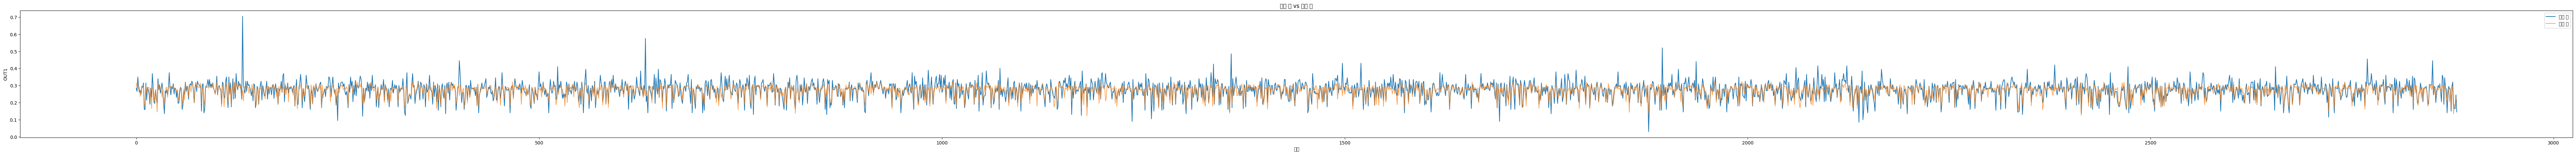

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['IN1', 'IN2', 'IN5', 'Out1']])


X = scaled_data[:, :-1]
Y = scaled_data[:, -1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, 3)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


model.fit(X_train, Y_train, epochs=70, batch_size=60, verbose=2)


loss = model.evaluate(X_test, Y_test, verbose=2)
print(f'Test loss: {loss}')

import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

Y_pred = model.predict(X_test)

r2 = r2_score(Y_test, Y_pred)
print("R2 스코어:", r2)

plt.figure(figsize=(100, 5))
plt.plot(Y_test, label='실제 값')
plt.plot(Y_pred, label='예측 값', alpha=0.7)
plt.title('실제 값 vs 예측 값')
plt.xlabel('샘플')
plt.ylabel('OUT1')
plt.legend()
plt.show()
